In [2]:
%run ../template.ipynb

In [3]:
exp_id = "050318"
series_names = ["mainstream", "maxsharing", "nosharing"]

In [4]:
setups = dataloaders.load_setups(exp_id,
                                 legacy='InconsistentIds')

Loading setups... Using InconsistentIds... Done (1300 loaded)


In [5]:
rows = []
for series_name in series_names:
    schedules = dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*.v1", variant='v1+metrics', setups=setups)
    # Extract some attributes from the schedules.
    # Add on some based on the file name.
#     for schedule in schedules:
#         print schedule._costs, sum(schedule._costs), schedule.stem_cost, schedule.budget
#         print zip(schedule.frozens, schedule.fpses)
#         print schedule.frozens
#         print schedule.fpses
#         print
    rows += ex(schedules,
               each=lambda s: s.to_map(extras={'stem_cost': s.stem_cost, 'apps_cost': sum(s.costs)}),
               constant={'scheduler': 'greedy', 'sharing': series_name})
df = comb(rows)

In [6]:
df['total_cost'] = df['stem_cost'] + df['apps_cost']
df['stem_cost_ratio'] = df['stem_cost'] / df['total_cost']
df_view = df[df['sharing'] == 'mainstream']
grouped = df_view.groupby(['budget', 'num_apps'])
grouped[['stem_cost', 'apps_cost', 'total_cost', 'f1', 'fps']].mean()

stem_cost   apps_cost  total_cost        f1       fps
budget num_apps                                                        
50.0   2          37.488204   10.928044   48.416248  0.303815  2.000000
       3          39.170640   10.214364   49.385004  0.306075  2.000000
       4          39.722280   10.134812   49.857092  0.304921  2.000000
       5          40.334064    9.579748   49.913812  0.297194  2.000000
       6          40.544400    9.243084   49.787484  0.295194  2.000000
       7          40.554360    9.094304   49.648664  0.295798  2.000000
       8          40.624080    9.317536   49.941616  0.295201  2.000000
       9          41.540400    7.771992   49.312392  0.292242  2.000000
       10         41.540400    7.844000   49.384400  0.292441  2.000000
       15         41.540400    8.280000   49.820400  0.291653  2.000000
       20         41.540400    7.720000   49.260400  0.288869  2.000000
       25         41.540400    8.156000   49.696400  0.288335  2.000000
       30         41.540400    8.347200   49.887600  0.288318  2.000000
100.0  2          74.957544   21.789182   96.746726  0.682833  3.985000
       3          78.483816   20.106036   98.589852  0.687690  3.980000
       4          80.365560   19.262218   99.627778  0.682682  3.977500
       5          81.506784   18.047724   99.554508  0.671234  3.978000
       6          82.383600   17.170410   99.554010  0.663935  3.975000
       7          82.881600   16.716896   99.598496  0.662975  3.975714
       8          83.080800   16.435394   99.516194  0.659732  3.973750
       9          83.080800   16.428092   99.508892  0.659390  3.968889
       10         83.080800   16.520558   99.601358  0.661018  3.974000
       15         83.080800   16.365438   99.446238  0.660462  3.974000
       20         83.080800   16.474648   99.555448  0.656318  3.963500
       25         83.080800   16.416120   99.496920  0.654678  3.975600
150.0  2         125.160270   18.668534  143.828804  0.812920  5.860000
       3         133.526544   14.040838  147.567382  0.798365  5.913333
       4         139.440846    9.856556  149.297402  0.792637  5.907500
       5         141.594252    7.596114  149.190366  0.788761  5.970000
       6         143.297076    6.111428  149.408504  0.781921  6.018333
...                     ...         ...         ...       ...       ...
200.0  8         183.551352   16.001884  199.553236  0.804358  6.878750
       9         183.717984   15.913696  199.631680  0.804818  6.904444
       10        185.685588   13.933306  199.618894  0.803330  6.925000
       15        186.934743   12.824936  199.759679  0.801836  7.013333
       20        186.963519   12.864751  199.828270  0.798195  7.029500
       25        186.999489   12.872061  199.871550  0.796731  7.000800
250.0  2         157.805622   56.567244  214.372866  0.838993  7.395000
       3         169.096128   60.208832  229.304960  0.836881  7.196667
       4         180.746148   60.401916  241.148064  0.836702  7.035000
       5         188.094294   59.294678  247.388972  0.836303  7.084000
       6         192.249174   56.762602  249.011776  0.830471  7.071667
       7         195.176610   53.988650  249.165260  0.830597  7.151429
       8         200.519496   48.921392  249.440888  0.826837  7.198750
       9         200.772480   48.793332  249.565812  0.826452  7.200000
       10        202.064262   47.534492  249.598754  0.826617  7.175000
       15        207.487608   42.258761  249.746369  0.822959  7.239333
       20        207.299676   42.540205  249.839881  0.818614  7.305500
       25        207.731103   42.142654  249.873757  0.815172  7.340800
300.0  2         154.665888   69.082256  223.748144  0.839309  7.420000
       3         165.091074   87.099984  252.191058  0.837958  7.240000
       4         178.642326   97.239354  275.881680  0.838921  7.252500
       5         188.126202  102.681842  290.808044  0.840216  7.240000
       6         191.354802  103.565072  294.919874  0.836

In [7]:
grouped[['stem_cost', 'apps_cost', 'total_cost', 'f1', 'fps']].std()

stem_cost     apps_cost    total_cost        f1       fps
budget num_apps                                                           
50.0   2          2.509952  3.460227e+00  1.584424e+00  0.098150  0.000000
       3          0.884201  1.352416e+00  7.171692e-01  0.082447  0.000000
       4          0.606310  6.476513e-01  1.478423e-01  0.062449  0.000000
       5          0.338987  3.990135e-01  1.044308e-01  0.057569  0.000000
       6          0.000000  7.042773e-02  7.042773e-02  0.054612  0.000000
       7          0.099600  1.191349e-01  9.638417e-02  0.049346  0.000000
       8          0.271569  3.383164e-01  6.674715e-02  0.048116  0.000000
       9          0.000000  8.682056e-02  8.682056e-02  0.042710  0.000000
       10         0.000000  6.498611e-16  0.000000e+00  0.042329  0.000000
       15         0.000000  1.129127e-15  3.193652e-15  0.032506  0.000000
       20         0.000000  6.971842e-16  0.000000e+00  0.031745  0.000000
       25         0.000000  1.143153e-15  0.000000e+00  0.024662  0.000000
       30         0.000000  1.705274e-15  1.723319e-15  0.018485  0.000000
100.0  2          5.000209  6.970507e+00  3.251782e+00  0.155113  0.085723
       3          1.853285  2.748590e+00  1.385839e+00  0.133293  0.079561
       4          1.522660  1.720732e+00  4.524657e-01  0.101340  0.071906
       5          0.936312  1.048895e+00  2.710283e-01  0.093831  0.062893
       6          0.954910  9.464232e-01  3.115377e-01  0.090079  0.064332
       7          0.600611  6.564210e-01  3.032976e-01  0.082524  0.053932
       8          0.000000  3.607921e-01  3.607921e-01  0.078733  0.054167
       9          0.000000  3.207471e-01  3.207471e-01  0.071901  0.061328
       10         0.000000  3.096372e-01  3.096372e-01  0.068692  0.048451
       15         0.000000  2.706291e-01  2.706291e-01  0.053513  0.040084
       20         0.000000  5.423725e-01  5.423725e-01  0.051770  0.027391
       25         0.000000  3.074489e-01  3.074489e-01  0.041715  0.034998
150.0  2         20.655677  1.549101e+01  1.089679e+01  0.119168  0.921352
       3         19.535324  1.656389e+01  6.398915e+00  0.099528  0.871831
       4         13.859933  1.329072e+01  1.001905e+00  0.077759  0.658717
       5         10.953174  1.091700e+01  9.191349e-01  0.077622  0.644714
       6          8.080814  8.135614e+00  4.646691e-01  0.073856  0.541175
...                    ...           ...           ...       ...       ...
200.0  8          9.854582  9.773559e+00  4.216521e-01  0.058669  0.814843
       9         10.689887  1.067652e+01  3.350560e-01  0.060370  0.803723
       10         5.769920  5.790226e+00  3.443554e-01  0.055947  0.727577
       15         0.029430  2.570813e-01  2.579418e-01  0.044492  0.574036
       20         0.090894  2.436786e-01  2.465309e-01  0.041505  0.483312
       25         0.124475  2.545567e-01  2.529790e-01  0.037951  0.472910
250.0  2         38.370057  3.018545e+01  3.907116e+01  0.119523  1.742654
       3         34.605764  2.203741e+01  3.282237e+01  0.094581  1.533095
       4         28.212871  1.756667e+01  2.009617e+01  0.075581  1.241140
       5         20.223640  1.855538e+01  9.687846e+00  0.072380  1.142805
       6         19.204860  1.829390e+01  1.914034e+00  0.066889  1.052829
       7         19.477556  1.909139e+01  1.046923e+00  0.059640  1.010728
       8         13.737960  1.379497e+01  6.155375e-01  0.054424  0.941149
       9         15.829768  1.571959e+01  4.122272e-01  0.058103  1.021773
       10        12.590414  1.256392e+01  4.254507e-01  0.051669  0.914681
       15         2.177196  2.176031e+00  2.366476e-01  0.041916  0.664717
       20         4.155860  4.175630e+00  2.034131e-01  0.039887  0.581920
       25         0.093059  1.761351e-01  1.669432e-01  0.037079  0.507861
300.0  2         39.205661  4.220840e+01  4.818042e+01  0.119587  1.762001
       3         33.624801  3.683305e+01  4.711876e+01  0.094478  1.533084
       4         26.452317  2.514913e+01  

Text(11.125,0.5,'Stem Cost / Total Cost Ratio')

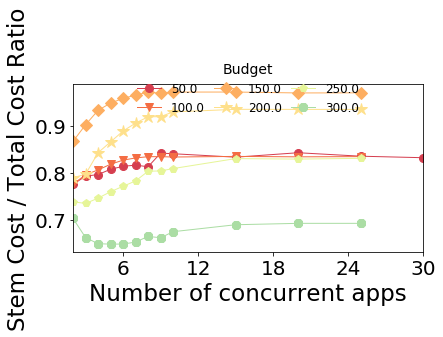

In [11]:
series = agg2series(grouped['stem_cost_ratio'].mean(),
                     names=sorted(set(df['budget'].values)),
                     plotstyles=None,
                     plotparams=dict(marker='.', lw=1, markersize=8))

ax = plot.variants(series,
                   xgrid=grids.x.num_apps,
                   legend_kwargs=dict(title='Budget', bbox_to_anchor=(0.5, 1.2), fontsize=12, ncol=3, loc='upper center'))
ax.set_ylabel("Stem Cost / Total Cost Ratio")

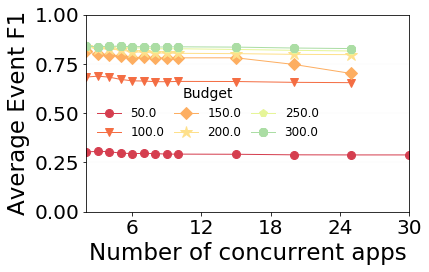

In [9]:
series = agg2series(grouped['f1'].mean(),
                     names=sorted(set(df['budget'].values)),
                     plotstyles=None,
                     plotparams=dict(marker='.', lw=1, markersize=8))

ax = plot.variants(series,
                   xgrid=grids.x.num_apps,
                   ygrid=grids.y.f1,
                   legend_kwargs=dict(title='Budget', fontsize=12, ncol=3, loc='best'))
bbox_to_anchor=(0.5, 1.2)

In [10]:
# series_fps = agg2series(grouped['fps'].mean(), names=series_names)
# series_acc = agg2series(1. - grouped['rel_acc'].mean(), names=series_names)

# series = agg2series(grouped['f1'].mean(),
#                      names=series_names,
#                      plotparams=dict(lw=1, markersize=8))

# ax = plot.variants(series,
#                    xgrid=grids.x.num_apps,
#                    ygrid=grids.y.f1,
#                    legend_kwargs=dict(bbox_to_anchor=(0.5, 1.2), fontsize=12, ncol=3, loc='upper center'))

# annotations = [
#     [Annotation(pt=1, xy=(10, 30), name='a', arrow_kwargs=dict(shrinkA=3), va='center'),
#      Annotation(pt=10, xy=(-25, 18), name='b', arrow_kwargs=dict(shrinkA=5), ha='center')],
#     [Annotation(pt=1, xy=(15, 25), name='c', va='center'),
#      Annotation(pt=10, xy=(-27, -20), name='d', ha='center', va='top')],
#     [Annotation(pt=1, xy=(25, -16), name='e', va='center'),
#      Annotation(pt=10, xy=(-30, 30), name='f', ha='right', va='center')],
# ]

# add_annotations(annotations,
#                 series,
#                 fmt_str="({name}) Frame Rel Acc: {acc:.2g}, FPS: {fps:.2g}",
#                 extra={'fps': series_fps, 'acc': series_acc},
#                 ax=ax)
# save('scheduler', exp_id, '{}-7hybrid-annotated-b{:g}'.format("f1", 150), bbox_inches="tight")